# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [29]:
import pickle
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
titanic = load_obj('dataset')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Age           891 non-null float64
SibSp         891 non-null float64
Parch         891 non-null float64
Fare          891 non-null float64
isMale        891 non-null float64
Pclass_1      891 non-null float64
Pclass_2      891 non-null float64
Pclass_3      891 non-null float64
Embarked_C    891 non-null float64
Embarked_Q    891 non-null float64
Embarked_S    891 non-null float64
cluster       891 non-null int32
target        891 non-null int64
dtypes: float64(11), int32(1), int64(1)
memory usage: 87.1 KB


In [30]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid = {'max_depth': np.arange(1,10), 'min_samples_leaf': [1, 5, 10]}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [31]:
y = titanic['target']
titanic.drop('target', axis=1, inplace=True)
titanic.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,cluster
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710,2
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306,3
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0


In [32]:
gridsearch.fit(titanic, y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [33]:
sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0])[:3]

[(-0.48209563285679413, {'max_depth': 2, 'min_samples_leaf': 1}),
 (-0.48209563285679413, {'max_depth': 2, 'min_samples_leaf': 5}),
 (-0.48209563285679413, {'max_depth': 2, 'min_samples_leaf': 10})]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic, y, test_size=0.33, random_state=42)
'''x_train.drop(labels='target', axis = 1, inplace = True)
x_test.drop(labels='target', axis = 1, inplace = True)'''

"x_train.drop(labels='target', axis = 1, inplace = True)\nx_test.drop(labels='target', axis = 1, inplace = True)"

In [36]:
clf_final = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 1)
clf_final.fit(x_train, y_train)
clf_final.predict_proba(x_test)
clf_final.predict(x_test)
clf_final.score(x_test, y_test)

0.8033898305084746

In [37]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [49]:
get_tree_dot_view(clf_final, list(titanic.columns.values), ['Survived','Died'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.467\nsamples = 596\nvalue = [374, 222]\nclass = Survived", fillcolor="#e5813968"] ;
1 [label="cluster <= 1.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]\nclass = Died", fillcolor="#399de59d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.454\nsamples = 66\nvalue = [43, 23]\nclass = Survived", fillcolor="#e5813977"] ;
1 -> 2 ;
3 [label="gini = 0.18\nsamples = 140\nvalue = [14, 126]\nclass = Died", fillcolor="#399de5e3"] ;
1 -> 3 ;
4 [label="Age <= -2.016\ngini = 0.304\nsamples = 390\nvalue = [317, 73]\nclass = Survived", fillcolor="#e58139c4"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Died", fillcolor="#399de5b3"] ;
4 -> 5 ;
6 [label="gini = 0.278\nsamples = 377\nvalue = [314, 63]\nclass = Survived", fillcolor="#e58139cc"] ;
4 -> 6 ;
}


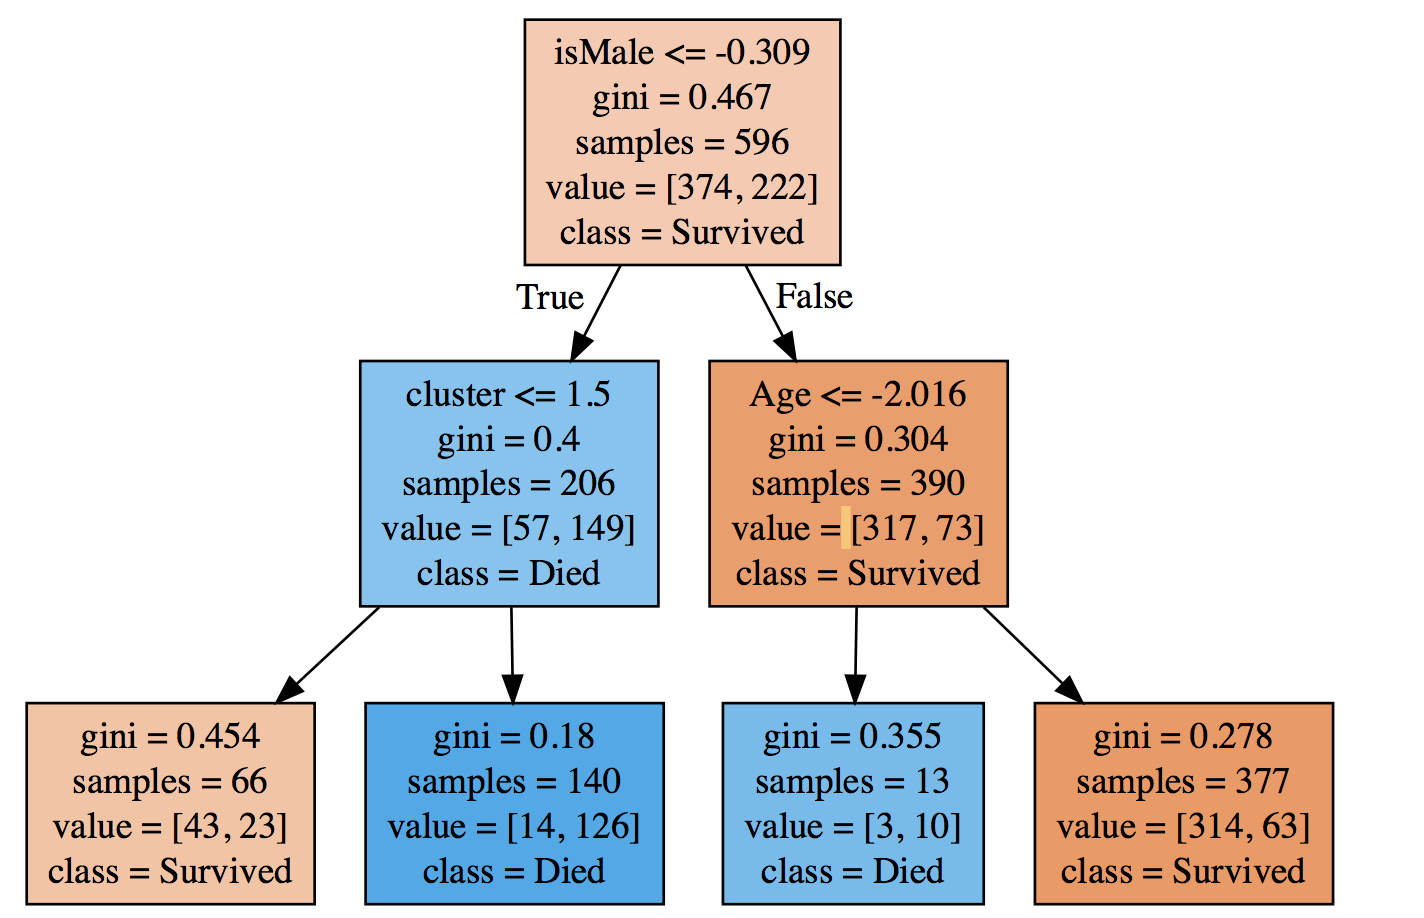

In [51]:
from IPython.display import display, Image
i = Image(filename='tree.png')
display(i)